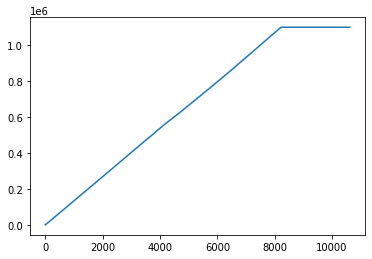

In [2]:
import pandas
import matplotlib.pyplot as plt
usecol = ["Disk_Usage", "Ref_time"]
dataset = pandas.read_csv('rabbitmq_uncompressed_ip_rate_greater.csv', usecols=usecol, engine='python')
dataset = dataset.set_index("Ref_time")
#dataset.head(7)
plt.plot(dataset)
plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [5]:
dataframe = pandas.read_csv('rabbitmq_uncompressed_ip_rate_greater.csv')
dataframe

,Time,Disk_Usage,Ref_time
0,1631918617,1208,0
1,1631918618,1208,1
2,1631918620,1510,3
3,1631918622,1812,5
4,1631918623,1812,6
...,...,...,...
6416,1631929225,1099809,10608
6417,1631929226,1099809,10609
6418,1631929228,1099809,10611
6419,1631929229,1099809,10612


In [6]:
data = dataframe.filter(['Disk_Usage'])
# convert the data frame to numpy array
dataset = data.values

training_data_len = math.ceil(len(dataset) * .7)
training_data_len

4495

In [7]:
# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00000000e+00],
       [0.00000000e+00],
       [2.74895071e-04],
       ...,
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00]])

In [8]:
# create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
# split the data into x_train and y_train
x_train= []
y_train=[]

for i in range (30, len(train_data)):
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 31:
        print(x_train)
        print(y_train)

[array([0.        , 0.        , 0.0002749 , 0.00054979, 0.00054979,
       0.00109958, 0.00109958, 0.00137265, 0.00137174, 0.00164573,
       0.00192062, 0.00219552, 0.00219552, 0.00247041, 0.00247041,
       0.00274531, 0.0030202 , 0.00329601, 0.00357182, 0.00357273,
       0.00384853, 0.00412343, 0.00439832, 0.00439832, 0.00467322,
       0.00467322, 0.00494811, 0.00522301, 0.0054979 , 0.0057728 ])]
[0.005772796492994272]
[array([0.        , 0.        , 0.0002749 , 0.00054979, 0.00054979,
       0.00109958, 0.00109958, 0.00137265, 0.00137174, 0.00164573,
       0.00192062, 0.00219552, 0.00219552, 0.00247041, 0.00247041,
       0.00274531, 0.0030202 , 0.00329601, 0.00357182, 0.00357273,
       0.00384853, 0.00412343, 0.00439832, 0.00439832, 0.00467322,
       0.00467322, 0.00494811, 0.00522301, 0.0054979 , 0.0057728 ]), array([0.        , 0.0002749 , 0.00054979, 0.00054979, 0.00109958,
       0.00109958, 0.00137265, 0.00137174, 0.00164573, 0.00192062,
       0.00219552, 0.00219552, 0.

In [9]:
# convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
# reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(4465, 30, 1)

In [12]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [13]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
model.fit(x_train, y_train, batch_size=1, epochs=50)

Epoch 1/50
4465/4465 [==============================] - 33s 7ms/step - loss: 5.1600e-04
Epoch 2/50
4465/4465 [==============================] - 33s 7ms/step - loss: 6.7717e-05
Epoch 3/50
4465/4465 [==============================] - 62s 14ms/step - loss: 8.3071e-05
Epoch 4/50
4465/4465 [==============================] - 69s 15ms/step - loss: 9.0950e-05
Epoch 5/50
4465/4465 [==============================] - 65s 15ms/step - loss: 7.9604e-05
Epoch 6/50
4465/4465 [==============================] - 63s 14ms/step - loss: 3.6915e-05
Epoch 7/50
4465/4465 [==============================] - 64s 14ms/step - loss: 4.0745e-05
Epoch 8/50
4465/4465 [==============================] - 69s 15ms/step - loss: 3.2819e-05
Epoch 9/50
4465/4465 [==============================] - 66s 15ms/step - loss: 3.4560e-05
Epoch 10/50
4465/4465 [==============================] - 63s 14ms/step - loss: 2.7794e-05
Epoch 11/50
4465/4465 [==============================] - 67s 15ms/step - loss: 3.8919e-05
Epoch 12/50
4465/4465

In [15]:
# create the testing dataset
# array from 10500 to 15042
test_data = scaled_data[training_data_len - 30: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])

In [16]:
# convert data to numpy array
x_test = np.array(x_test)

In [17]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [18]:
# get the models predicted values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [19]:
# get the root mean squared error
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

948.4042705088266

C:\Users\anush\AppData\Local\Temp/ipykernel_10144/3197375814.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


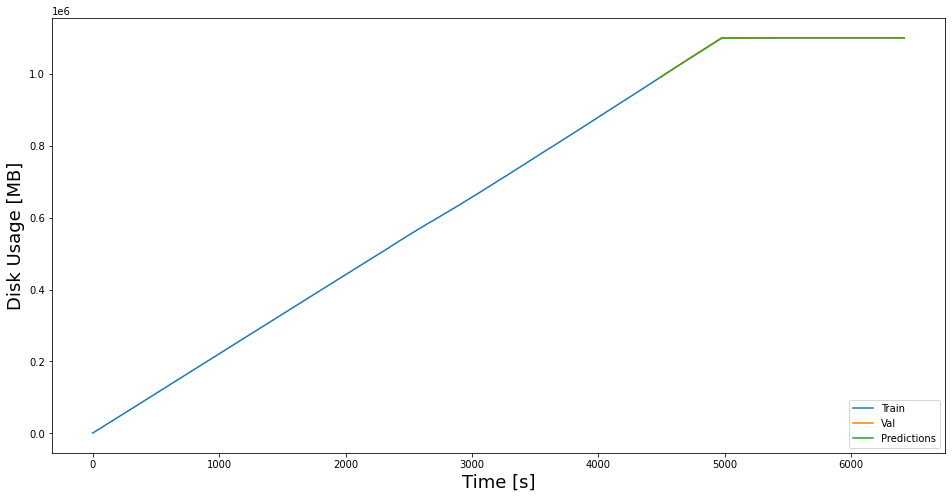

In [20]:
# plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# visualize
plt.figure(figsize=(16,8))
plt.xlabel('Time [s]', fontsize=18)
plt.ylabel('Disk Usage [MB]', fontsize=18)
plt.plot(train['Disk_Usage'])
plt.plot(valid[['Disk_Usage', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [26]:
valid
import csv

with open(r'rabbitmq_lstm_disk_space.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['timeslot', 'rl_storage_allocation', 'downtime'])

In [27]:
# Get the data
new_df = dataframe.filter(['Disk_Usage'])
new_dataset = new_df.values
length_new_dataset = len(new_dataset)
downtime = 0
previous_value = 0
print(length_new_dataset)
for i in range(30, length_new_dataset):
    last_30_days = new_df[i-30:i].values
    last_30_days_scaled = scaler.transform(last_30_days)
    # create an empty list
    X_test = []
    X_test.append(last_30_days_scaled)
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    # get the predicted scaled value
    pred_disk_usage = model.predict(X_test)
    # undo scaling
    pred_disk_usage = scaler.inverse_transform(pred_disk_usage)
    difference = pred_disk_usage.item() - previous_value
    
    if difference == 0:
        pass
    elif difference > 0:
        downtime += 1
    else:
        if difference < -4000:
            downtime += 40
        else:
            pass
    with open(r'rabbitmq_lstm_disk_space.csv', 'a') as f:
        writer = csv.writer(f)
        writer.writerow([i, pred_disk_usage, downtime])
    print(pred_disk_usage)
    
    previous_value = pred_disk_usage.item()
    
#last_30_days

6421
[[6044.12]]
[[6246.426]]
[[6458.8486]]
[[6701.835]]
[[6969.8022]]
[[7167.361]]
[[7376.739]]
[[7531.0137]]
[[7799.423]]
[[8021.3896]]
[[8251.688]]
[[8506.036]]
[[8694.1]]
[[8897.485]]
[[9134.922]]
[[9399.305]]
[[9594.473]]
[[9802.018]]
[[9955.244]]
[[10136.416]]
[[10360.118]]
[[10616.086]]
[[10892.681]]
[[11095.232]]
[[11307.736]]
[[11550.969]]
[[11819.182]]
[[12016.937]]
[[12226.331]]
[[12380.573]]
[[12562.072]]
[[12786.052]]
[[13041.873]]
[[13231.132]]
[[13434.485]]
[[13671.397]]
[[13935.584]]
[[14217.826]]
[[14424.094]]
[[14638.121]]
[[14794.802]]
[[15064.129]]
[[15286.783]]
[[15517.2295]]
[[15685.059]]
[[15874.792]]
[[16016.773]]
[[16277.636]]
[[16582.273]]
[[16808.66]]
[[17036.225]]
[[17201.846]]
[[17477.31]]
[[17704.451]]
[[17938.041]]
[[18107.852]]
[[18298.664]]
[[18440.957]]
[[18701.328]]
[[19004.918]]
[[19230.389]]
[[19457.217]]
[[19622.246]]
[[19897.205]]
[[20124.164]]
[[20357.492]]
[[20527.105]]
[[20717.592]]
[[20859.9]]
[[21120.828]]
[[21425.924]]
[[21652.557]]
[[21879.

[[138617.14]]
[[138907.83]]
[[139122.8]]
[[139339.52]]
[[139493.48]]
[[139761.17]]
[[139989.81]]
[[140224.83]]
[[140392.55]]
[[140576.23]]
[[140802.48]]
[[141066.98]]
[[141358.88]]
[[141574.31]]
[[141790.38]]
[[141943.06]]
[[142209.58]]
[[142437.02]]
[[142670.86]]
[[142837.38]]
[[143019.73]]
[[143151.45]]
[[143406.92]]
[[143724.73]]
[[143969.14]]
[[144208.38]]
[[144377.33]]
[[144654.31]]
[[144888.64]]
[[145125.73]]
[[145292.56]]
[[145473.55]]
[[145603.22]]
[[145856.58]]
[[146172.02]]
[[146413.36]]
[[146648.94]]
[[146813.89]]
[[147087.86]]
[[147319.77]]
[[147555.89]]
[[147722.78]]
[[147904.52]]
[[148034.92]]
[[148288.47]]
[[148510.]]
[[148742.02]]
[[149003.11]]
[[149196.56]]
[[149492.53]]
[[149739.17]]
[[149983.69]]
[[150154.73]]
[[150337.77]]
[[150467.86]]
[[150721.02]]
[[150942.34]]
[[151174.5]]
[[151435.78]]
[[151628.69]]
[[151923.64]]
[[152169.5]]
[[152413.34]]
[[152584.02]]
[[152766.5]]
[[152895.8]]
[[153146.95]]
[[153366.3]]
[[153596.81]]
[[153857.]]
[[154049.72]]
[[154344.88]]
[[

[[269566.2]]
[[269897.38]]
[[270154.97]]
[[270398.22]]
[[270557.34]]
[[270722.62]]
[[270933.7]]
[[271193.78]]
[[271389.94]]
[[271592.44]]
[[271730.97]]
[[271993.28]]
[[272227.03]]
[[272470.66]]
[[272641.]]
[[272821.]]
[[273046.2]]
[[273317.7]]
[[273623.88]]
[[273848.44]]
[[274063.8]]
[[274204.06]]
[[274461.4]]
[[274687.2]]
[[274922.1]]
[[275084.6]]
[[275258.1]]
[[275581.06]]
[[275868.1]]
[[276146.88]]
[[276333.53]]
[[276514.38]]
[[276628.7]]
[[276870.5]]
[[277089.5]]
[[277324.38]]
[[277490.66]]
[[277670.03]]
[[277896.88]]
[[278171.47]]
[[278481.06]]
[[278708.38]]
[[278925.6]]
[[279066.22]]
[[279323.34]]
[[279548.12]]
[[279781.44]]
[[279941.9]]
[[280113.7]]
[[280333.44]]
[[280602.6]]
[[280806.62]]
[[281015.03]]
[[281157.16]]
[[281421.53]]
[[281758.9]]
[[282021.1]]
[[282266.53]]
[[282424.97]]
[[282588.]]
[[282796.6]]
[[283055.12]]
[[283250.56]]
[[283452.56]]
[[283590.38]]
[[283852.]]
[[284085.38]]
[[284328.12]]
[[284598.4]]
[[284792.72]]
[[285090.66]]
[[285340.78]]
[[285586.28]]
[[285748

[[401990.88]]
[[402179.62]]
[[402295.25]]
[[402434.03]]
[[402638.25]]
[[402910.38]]
[[403123.75]]
[[403343.56]]
[[403599.6]]
[[403893.94]]
[[404216.3]]
[[404442.7]]
[[404649.16]]
[[404767.88]]
[[404900.12]]
[[405093.06]]
[[405353.47]]
[[405557.3]]
[[405770.9]]
[[405913.97]]
[[406186.4]]
[[406538.72]]
[[406812.66]]
[[407064.16]]
[[407215.03]]
[[407474.62]]
[[407693.53]]
[[407920.75]]
[[408069.53]]
[[408230.16]]
[[408333.75]]
[[408584.16]]
[[408819.75]]
[[409076.56]]
[[409367.06]]
[[409575.38]]
[[409888.38]]
[[410145.1]]
[[410392.56]]
[[410546.38]]
[[410701.62]]
[[410904.75]]
[[411165.56]]
[[411363.2]]
[[411567.72]]
[[411700.9]]
[[411854.53]]
[[412179.28]]
[[412478.72]]
[[412775.56]]
[[412970.34]]
[[413152.25]]
[[413367.38]]
[[413628.2]]
[[413818.34]]
[[414012.72]]
[[414136.56]]
[[414284.]]
[[414495.4]]
[[414772.72]]
[[414988.2]]
[[415207.38]]
[[415460.62]]
[[415751.9]]
[[416071.84]]
[[416296.38]]
[[416501.88]]
[[416619.66]]
[[416862.4]]
[[417077.72]]
[[417310.97]]
[[417470.]]
[[417641.6

[[534462.]]
[[534614.94]]
[[534816.94]]
[[535078.9]]
[[535275.1]]
[[535482.56]]
[[535615.25]]
[[535771.75]]
[[536106.2]]
[[536409.5]]
[[536712.5]]
[[536907.44]]
[[537088.94]]
[[537186.4]]
[[537425.25]]
[[537639.8]]
[[537882.3]]
[[538050.]]
[[538233.3]]
[[538582.44]]
[[538889.3]]
[[539187.5]]
[[539372.8]]
[[539544.5]]
[[539633.94]]
[[539868.8]]
[[540081.7]]
[[540323.25]]
[[540490.2]]
[[540671.7]]
[[541019.44]]
[[541324.75]]
[[541622.]]
[[541806.8]]
[[541977.7]]
[[542066.1]]
[[542300.06]]
[[542512.]]
[[542753.7]]
[[542921.44]]
[[543105.]]
[[543454.7]]
[[543761.25]]
[[544059.2]]
[[544244.25]]
[[544415.56]]
[[544504.25]]
[[544737.9]]
[[544948.9]]
[[545189.5]]
[[545356.9]]
[[545540.8]]
[[545891.3]]
[[546198.94]]
[[546498.1]]
[[546684.2]]
[[546856.56]]
[[546946.2]]
[[547181.4]]
[[547393.7]]
[[547635.3]]
[[547802.2]]
[[547984.]]
[[548215.7]]
[[548501.]]
[[548827.2]]
[[549059.2]]
[[549276.7]]
[[549515.75]]
[[549788.06]]
[[549974.2]]
[[550160.9]]
[[550270.]]
[[550407.94]]
[[550614.7]]
[[550893.

[[665403.56]]
[[665553.56]]
[[665714.9]]
[[665806.9]]
[[665942.8]]
[[666153.2]]
[[666436.06]]
[[666653.44]]
[[666887.2]]
[[667038.75]]
[[667213.]]
[[667557.56]]
[[667850.4]]
[[668143.5]]
[[668328.3]]
[[668511.5]]
[[668612.25]]
[[668864.06]]
[[669196.75]]
[[669451.8]]
[[669705.1]]
[[669859.3]]
[[670024.94]]
[[670120.06]]
[[670375.9]]
[[670599.]]
[[670852.2]]
[[671143.8]]
[[671347.4]]
[[671557.]]
[[671800.3]]
[[672082.7]]
[[672278.4]]
[[672481.8]]
[[672721.44]]
[[672883.5]]
[[673183.94]]
[[673427.06]]
[[673680.7]]
[[673841.5]]
[[674016.]]
[[674119.25]]
[[674380.94]]
[[674606.7]]
[[674860.5]]
[[675150.8]]
[[675352.6]]
[[675560.25]]
[[675802.]]
[[676083.3]]
[[676278.2]]
[[676481.75]]
[[676603.75]]
[[676756.56]]
[[676853.56]]
[[677120.5]]
[[677475.6]]
[[677753.44]]
[[678025.6]]
[[678192.1]]
[[678363.56]]
[[678576.4]]
[[678838.94]]
[[679025.5]]
[[679228.44]]
[[679473.06]]
[[679642.25]]
[[679833.9]]
[[680073.06]]
[[680360.94]]
[[680566.6]]
[[680781.75]]
[[680913.2]]
[[681071.94]]
[[681288.9]]

[[802117.75]]
[[802337.44]]
[[802605.7]]
[[802912.1]]
[[803126.75]]
[[803353.8]]
[[803494.94]]
[[803666.56]]
[[803888.25]]
[[804158.06]]
[[804464.44]]
[[804677.8]]
[[804902.3]]
[[805040.5]]
[[805209.94]]
[[805545.8]]
[[805813.56]]
[[806090.56]]
[[806269.06]]
[[806463.3]]
[[806580.2]]
[[806851.94]]
[[807065.7]]
[[807306.94]]
[[807582.56]]
[[807771.3]]
[[807980.4]]
[[808226.1]]
[[808507.9]]
[[808701.44]]
[[808913.9]]
[[809161.44]]
[[809327.5]]
[[809520.44]]
[[809756.06]]
[[810033.5]]
[[810342.3]]
[[810554.94]]
[[810778.06]]
[[810914.9]]
[[811197.6]]
[[811414.6]]
[[811654.]]
[[811925.06]]
[[812108.3]]
[[812312.8]]
[[812440.2]]
[[812721.44]]
[[812941.1]]
[[813185.8]]
[[813462.8]]
[[813651.3]]
[[813859.7]]
[[814104.44]]
[[814384.75]]
[[814576.56]]
[[814787.8]]
[[815034.8]]
[[815200.9]]
[[815508.94]]
[[815743.56]]
[[815993.4]]
[[816154.]]
[[816340.75]]
[[816572.06]]
[[816730.9]]
[[817038.44]]
[[817276.5]]
[[817531.06]]
[[817696.]]
[[817885.5]]
[[818118.44]]
[[818392.06]]
[[818696.7]]
[[81890

[[941148.5]]
[[941345.94]]
[[941567.7]]
[[941711.2]]
[[941895.4]]
[[942231.4]]
[[942479.4]]
[[942742.4]]
[[942916.3]]
[[943120.9]]
[[943253.4]]
[[943537.8]]
[[943854.]]
[[944073.9]]
[[944312.56]]
[[944576.4]]
[[944752.]]
[[945064.2]]
[[945287.5]]
[[945529.]]
[[945685.7]]
[[945877.4]]
[[946109.]]
[[946372.9]]
[[946660.75]]
[[946856.1]]
[[947076.8]]
[[947220.3]]
[[947404.9]]
[[947740.8]]
[[947988.25]]
[[948250.75]]
[[948424.25]]
[[948628.56]]
[[948760.7]]
[[949045.5]]
[[949253.4]]
[[949489.1]]
[[949753.5]]
[[949932.94]]
[[950250.94]]
[[950480.2]]
[[950728.1]]
[[950890.7]]
[[951087.3]]
[[951214.44]]
[[951496.4]]
[[951810.56]]
[[952029.44]]
[[952268.06]]
[[952424.3]]
[[952617.75]]
[[952850.6]]
[[953116.]]
[[953296.9]]
[[953509.1]]
[[953756.56]]
[[954031.2]]
[[954325.4]]
[[954524.5]]
[[954747.3]]
[[954891.94]]
[[955076.6]]
[[955411.25]]
[[955656.7]]
[[955917.2]]
[[956089.1]]
[[956292.94]]
[[956425.]]
[[956709.6]]
[[957024.3]]
[[957242.75]]
[[957480.75]]
[[957636.56]]
[[957829.44]]
[[958061.

[[1075320.4]]
[[1075565.9]]
[[1075734.5]]
[[1076041.6]]
[[1076258.8]]
[[1076500.9]]
[[1076665.8]]
[[1076871.]]
[[1077109.9]]
[[1077372.1]]
[[1077650.]]
[[1077839.8]]
[[1078061.6]]
[[1078311.6]]
[[1078582.4]]
[[1078767.9]]
[[1078987.4]]
[[1079137.]]
[[1079332.4]]
[[1079663.9]]
[[1079898.8]]
[[1080152.8]]
[[1080325.9]]
[[1080536.5]]
[[1080680.]]
[[1080969.9]]
[[1081175.]]
[[1081409.2]]
[[1081668.5]]
[[1081847.]]
[[1082160.1]]
[[1082381.5]]
[[1082626.4]]
[[1082793.]]
[[1082999.5]]
[[1083140.1]]
[[1083427.9]]
[[1083730.8]]
[[1083939.5]]
[[1084174.1]]
[[1084334.]]
[[1084535.]]
[[1084770.8]]
[[1085031.]]
[[1085209.5]]
[[1085423.8]]
[[1085669.2]]
[[1085936.2]]
[[1086218.2]]
[[1086411.4]]
[[1086634.9]]
[[1086787.1]]
[[1086984.2]]
[[1087315.9]]
[[1087550.4]]
[[1087804.1]]
[[1087977.1]]
[[1088188.2]]
[[1088332.1]]
[[1088621.6]]
[[1088925.1]]
[[1089133.9]]
[[1089368.4]]
[[1089528.1]]
[[1089729.2]]
[[1089964.6]]
[[1090224.8]]
[[1090403.8]]
[[1090618.8]]
[[1090864.]]
[[1091130.8]]
[[1091411.9]]
[[1

[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098

[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098900.4]]
[[1098

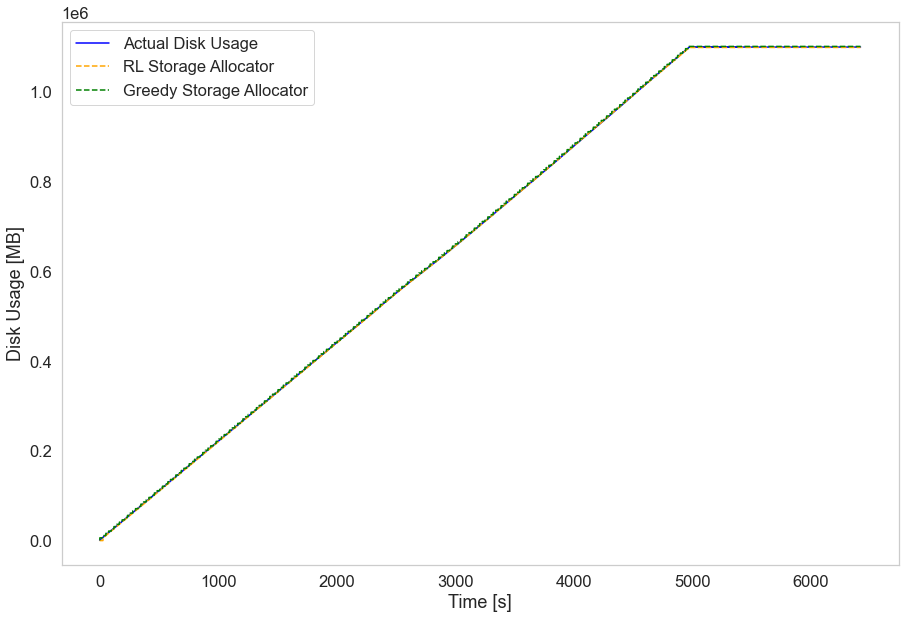

In [63]:
import seaborn as sns
usecol = ["actual_disk_usage", "timeslot", "rl_storage_allocation", "greedy_storage_allocation"]
predicted_usage_data = pandas.read_csv('rabbitmq_storage_allocation.csv', usecols=usecol, engine='python')
predicted_usage_data = predicted_usage_data.set_index("timeslot")
#dataset.head(7)
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.set_style("whitegrid", {'axes.grid' : False})
plt.xlabel('Time [s]')
plt.ylabel('Disk Usage [MB]')
plt.plot(predicted_usage_data['actual_disk_usage'], color='blue')
plt.plot(predicted_usage_data['rl_storage_allocation'], linestyle='--', color='orange')
plt.plot(predicted_usage_data['greedy_storage_allocation'], linestyle='--', color='green')
plt.legend(['Actual Disk Usage', 'RL Storage Allocator', 'Greedy Storage Allocator'], loc='upper left')
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\storage_allocator\rabbitmq\rabbitmq_storage_allocation.png", dpi = 300)
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\storage_allocator\rabbitmq\rabbitmq_storage_allocation.pdf", dpi = 300)
#plt.plot(predicted_usage_data)
plt.show()

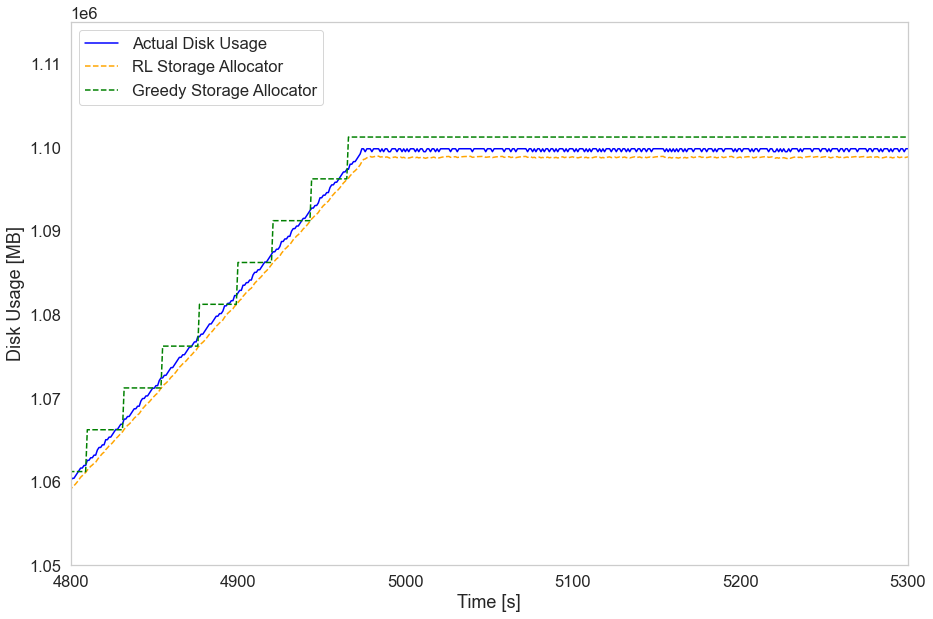

In [64]:
usecol = ["actual_disk_usage", "timeslot", "rl_storage_allocation", "greedy_storage_allocation"]
predicted_usage_data = pandas.read_csv('rabbitmq_storage_allocation.csv', usecols=usecol, engine='python')
predicted_usage_data = predicted_usage_data.set_index("timeslot")
#dataset.head(7)
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.set_style("whitegrid", {'axes.grid' : False})
plt.xlabel('Time [s]')
plt.ylabel('Disk Usage [MB]')
plt.plot(predicted_usage_data['actual_disk_usage'], color='blue')
plt.plot(predicted_usage_data['rl_storage_allocation'], linestyle='--', color='orange')
plt.plot(predicted_usage_data['greedy_storage_allocation'], linestyle='--', color='green')
plt.legend(['Actual Disk Usage', 'RL Storage Allocator', 'Greedy Storage Allocator'], loc='upper left')
#plt.plot(predicted_usage_data)
plt.ylim(1050000, 1115000)
plt.xlim(4800,5300)
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\storage_allocator\rabbitmq\rabbitmq_storage_allocation_emph.png", dpi = 300)
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\storage_allocator\rabbitmq\rabbitmq_storage_allocation_emph.pdf", dpi = 300)

plt.show()

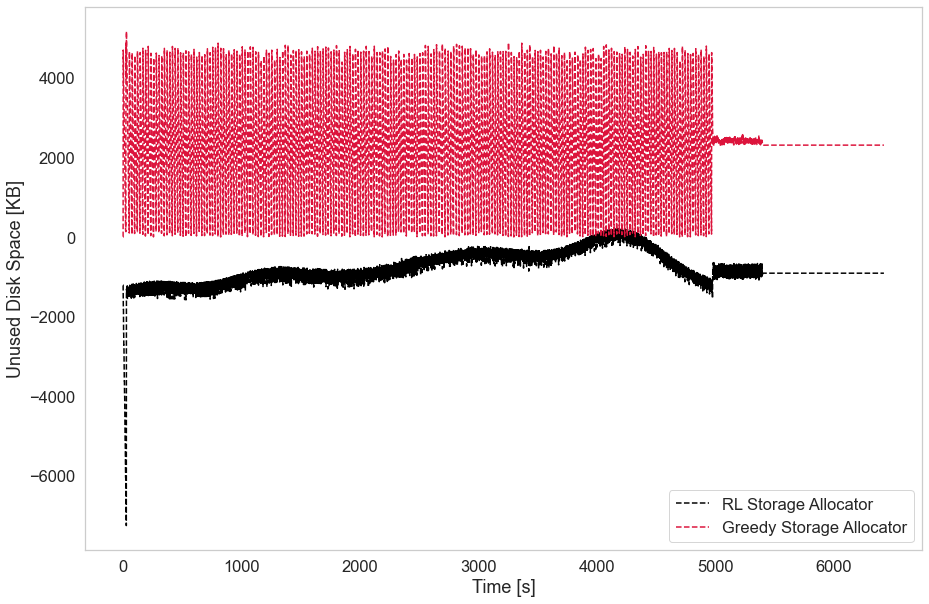

In [65]:
usecol = ["timeslot", "rl_unused_storage", "greedy_unused_storage"]
predicted_usage_data = pandas.read_csv('rabbitmq_storage_allocation.csv', usecols=usecol, engine='python')
predicted_usage_data = predicted_usage_data.set_index("timeslot")
#dataset.head(7)
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.set_style("whitegrid", {'axes.grid' : False})
plt.xlabel('Time [s]')
plt.ylabel('Unused Disk Space [KB]')
plt.plot(predicted_usage_data['rl_unused_storage'], linestyle='--', color='black')
plt.plot(predicted_usage_data['greedy_unused_storage'], linestyle='--', color='crimson')
plt.legend(['RL Storage Allocator', 'Greedy Storage Allocator'], loc='lower right')
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\storage_allocator\rabbitmq\rabbitmq_unused_storage.png", dpi = 300)
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\storage_allocator\rabbitmq\rabbitmq_unused_storage.pdf", dpi = 300)
#plt.plot(predicted_usage_data)
plt.show()

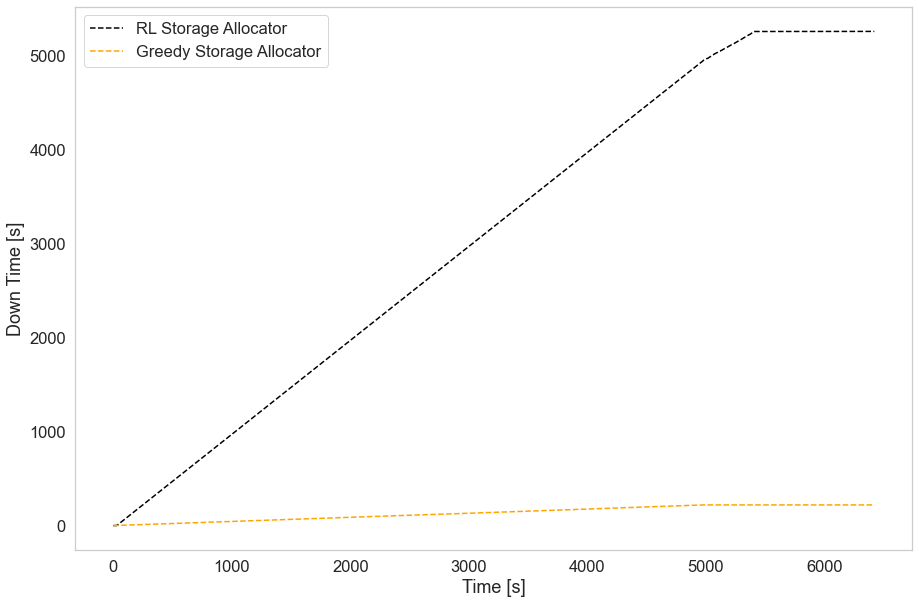

In [66]:
usecol = ["timeslot", "rl_downtime", "greedy_downtime"]
predicted_usage_data = pandas.read_csv('rabbitmq_storage_allocation.csv', usecols=usecol, engine='python')
predicted_usage_data = predicted_usage_data.set_index("timeslot")
#dataset.head(7)
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.set_style("whitegrid", {'axes.grid' : False})
plt.xlabel('Time [s]')
plt.ylabel('Down Time [s]')
plt.plot(predicted_usage_data['rl_downtime'], linestyle='--', color='black')
plt.plot(predicted_usage_data['greedy_downtime'], linestyle='--', color='orange')
plt.legend(['RL Storage Allocator', 'Greedy Storage Allocator'], loc='upper left')
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\storage_allocator\rabbitmq\rabbitmq_downtime.png", dpi = 300)
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\storage_allocator\rabbitmq\rabbitmq_downtime.pdf", dpi = 300)
#plt.plot(predicted_usage_data)
plt.show()

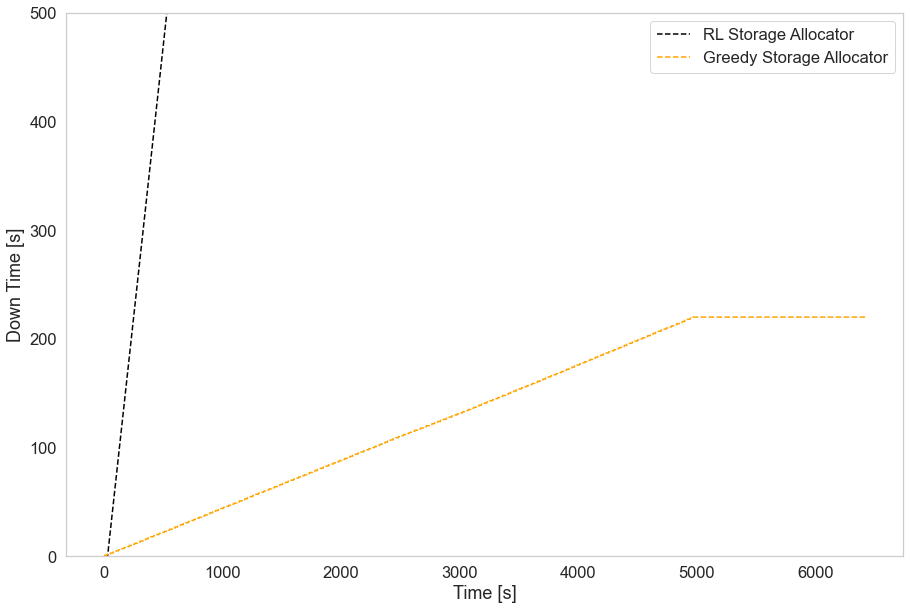

In [68]:
usecol = ["timeslot", "rl_downtime", "greedy_downtime"]
predicted_usage_data = pandas.read_csv('rabbitmq_storage_allocation.csv', usecols=usecol, engine='python')
predicted_usage_data = predicted_usage_data.set_index("timeslot")
#dataset.head(7)
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.set_style("whitegrid", {'axes.grid' : False})
plt.xlabel('Time [s]')
plt.ylabel('Down Time [s]')
plt.plot(predicted_usage_data['rl_downtime'], linestyle='--', color='black')
plt.plot(predicted_usage_data['greedy_downtime'], linestyle='--', color='orange')
plt.legend(['RL Storage Allocator', 'Greedy Storage Allocator'], loc='upper right')
#plt.plot(predicted_usage_data)
plt.ylim(0, 500)
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\storage_allocator\rabbitmq\rabbitmq_downtime_emph.png", dpi = 300)
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\storage_allocator\rabbitmq\rabbitmq_downtime_emph.pdf", dpi = 300)
plt.show()